In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np

print(f"TensorFlow version: {tf.__version__}")
print(f"Pandas version: {pd.__version__}")



x:\B.Tech\Iris_classification\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


TensorFlow version: 2.20.0
Pandas version: 2.3.3


In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_data = load_iris()
df = pd.DataFrame(data = iris_data.data, columns= iris_data.feature_names)
df['target'] = iris_data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Figure size 1000x800 with 0 Axes>

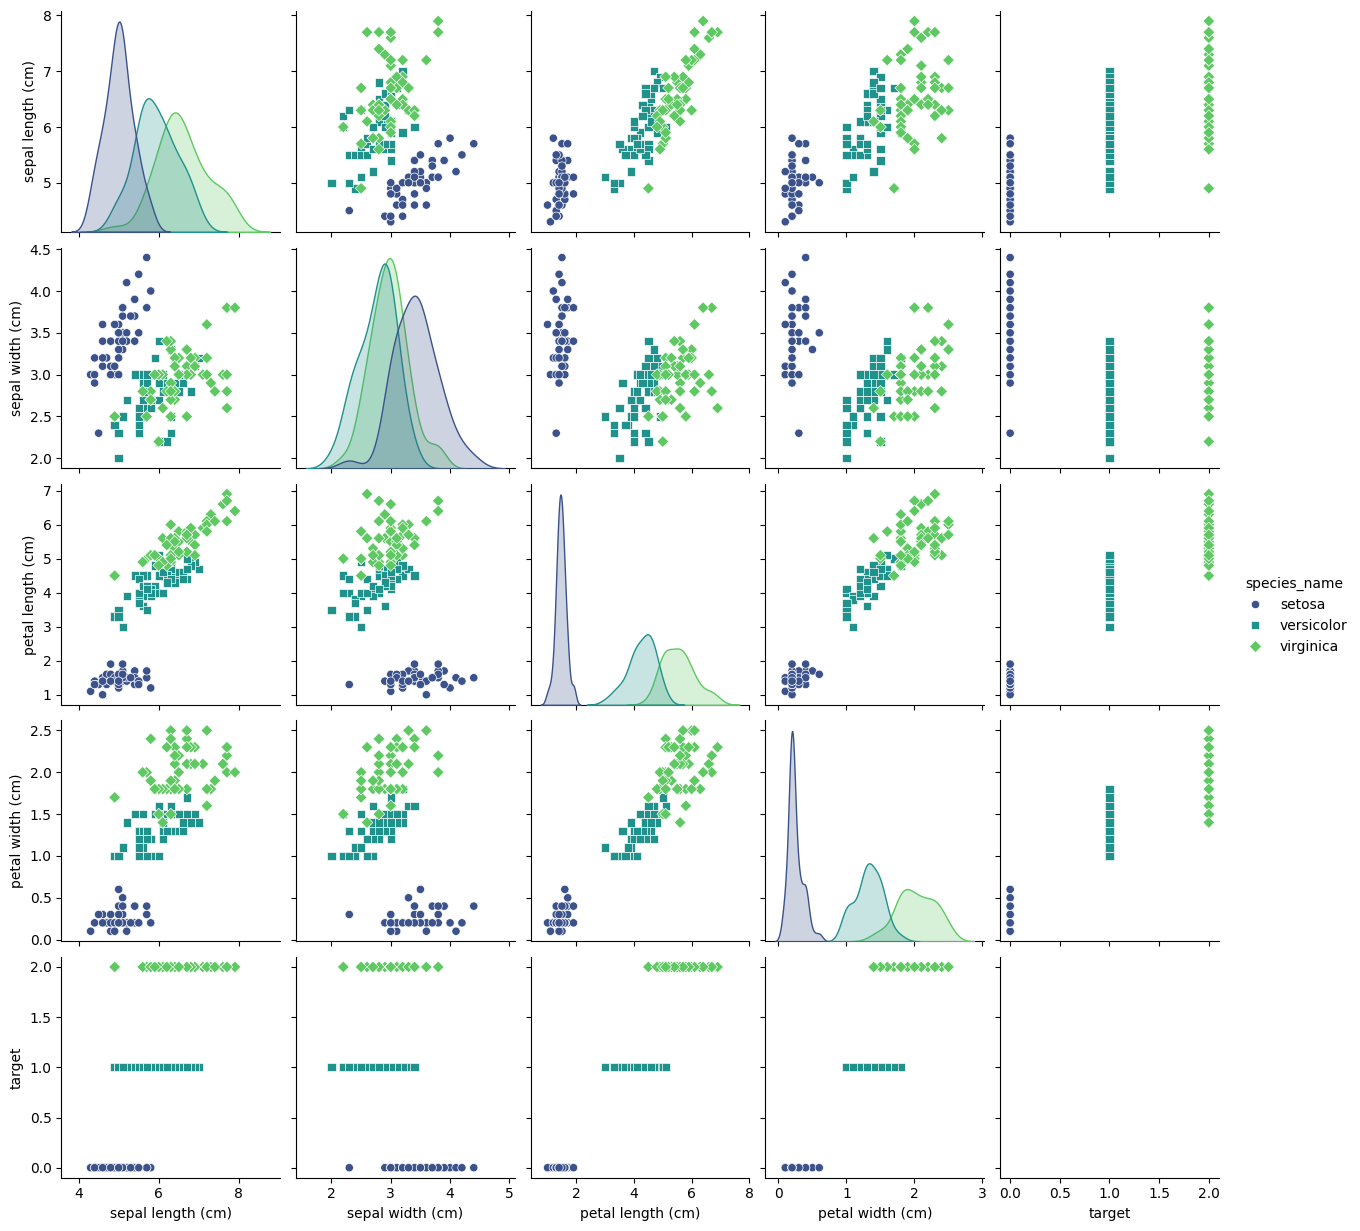

In [5]:
import matplotlib.pyplot as plt  
import seaborn as sns


plt.figure(figsize=(10,8)) 


df['species_name'] = df['target'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
})

sns.pairplot(df, hue='species_name', palette='viridis', markers=["o", "s", "D"])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
y = df['target'].values

X_train,X_temp,y_train,y_temp = train_test_split(X, y, test_size= 0.4, random_state=42)
X_cv,X_test,y_cv,y_test = train_test_split(X_temp,y_temp, test_size=0.5,random_state=42)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train_scaled.shape[0]}")
print(f"Cross-validation set : {X_cv_scaled.shape[0]}")
print(f"Testing set: {X_test_scaled.shape[0]}")
print(f"\n first row of scaled training  data is \n{X_train_scaled[0]}")


Training set: 90
Cross-validation set : 30
Testing set: 30

 first row of scaled training  data is 
[ 0.59142134 -0.74727985  0.62127077  0.74639154]


In [8]:
# Check the mean and standard deviation of the scaled training data
print(f"Mean of scaled data: {X_train_scaled.mean(axis=0)}") 
print(f"Std of scaled data:  {X_train_scaled.std(axis=0)}")

Mean of scaled data: [ 1.02633951e-15 -3.23799629e-15 -4.44089210e-17  1.50496899e-16]
Std of scaled data:  [1. 1. 1. 1.]


In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units=8, activation='relu',name="L1" ),
    Dense(units=3,activation='linear',name="L2")

])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [15]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=1000,
    verbose=1,
    validation_data=(X_cv_scaled,y_cv)
)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9889 - loss: 0.0605 - val_accuracy: 1.0000 - val_loss: 0.0245
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9889 - loss: 0.0610 - val_accuracy: 1.0000 - val_loss: 0.0230
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9889 - loss: 0.0602 - val_accuracy: 1.0000 - val_loss: 0.0235
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9889 - loss: 0.0596 - val_accuracy: 1.0000 - val_loss: 0.0252
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9889 - loss: 0.0597 - val_accuracy: 1.0000 - val_loss: 0.0260
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9889 - loss: 0.0592 - val_accuracy: 1.0000 - val_loss: 0.0266
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9889 - loss: 0.0596 - val_accuracy: 1.0000 - val_loss: 0.0266
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9889 - loss: 0.0584 - val_accuracy: 1.0000 - v

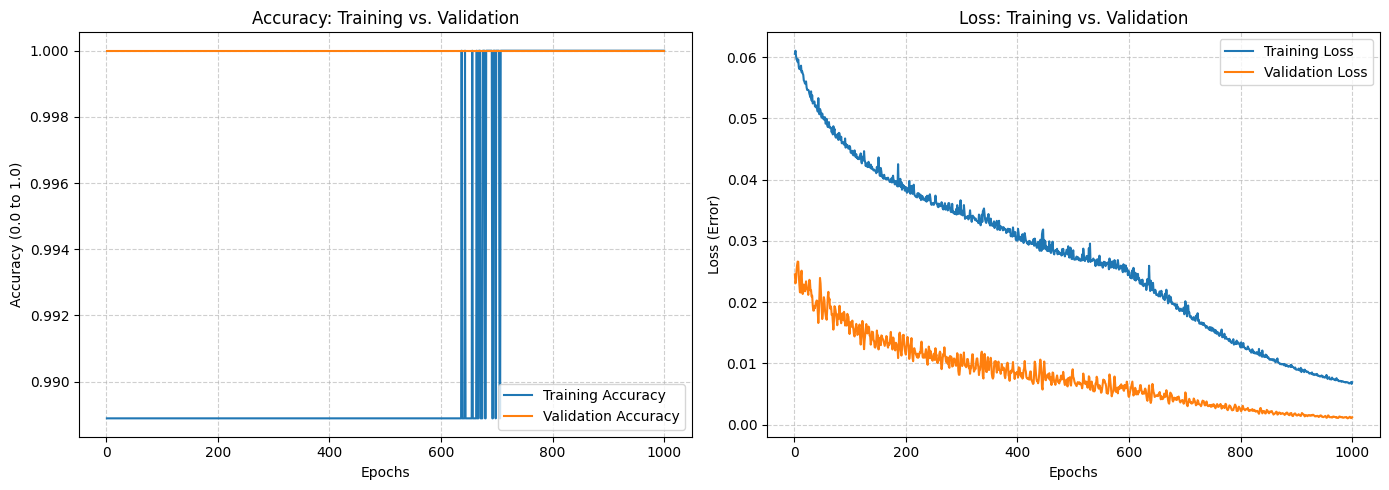

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)
plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='#1f77b4')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='#ff7f0e')
plt.title('Accuracy: Training vs. Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (0.0 to 1.0)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='#1f77b4')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='#ff7f0e')
plt.title('Loss: Training vs. Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss (Error)')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

In [ ]:
new_flower = np.array([[6.3, 2.7, 4.9, 1.8]]) #Give your input in this array in format[Sapal_length,sapal_width,petal_lenght,petal_width]
new_flower_scaled = scaler.transform(new_flower)
raw_prediction = model.predict(new_flower_scaled)
print(f"Raw Logits: {raw_prediction}")
probabilities = tf.nn.softmax(raw_prediction).numpy()
print(f"Probabilities: {probabilities}")
predicted_class = np.argmax(probabilities)

species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
print(f"The model predicts this is a: {species_map[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Raw Logits: [[-11.234461     0.69353855   4.4871306 ]]
Probabilities: [[1.4538841e-07 2.2018837e-02 9.7798103e-01]]
The model predicts this is a: virginica
